#`This notebook is an Illustration to create a Support Vector Machine with Sklearn using Python 🐍`

For more information, check out the [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

## **Setup**
Let's setup the imports:   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


# custom color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])  

# **Datatset**
Let's load the Mobile Price Classification dataset which is uploaded on my Google Drive.

In [2]:
!gdown --id 17wpxB4XilNQ54Yf7aYrpK6vTrvE7f5Gh 
!gdown --id 1hxdj2JGckweySFIJluiCztjAndsNLfGG 

Downloading...
From: https://drive.google.com/uc?id=17wpxB4XilNQ54Yf7aYrpK6vTrvE7f5Gh
To: /content/train.csv
100% 122k/122k [00:00<00:00, 48.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hxdj2JGckweySFIJluiCztjAndsNLfGG
To: /content/test.csv
100% 63.9k/63.9k [00:00<00:00, 72.1MB/s]


Let's read the CVS files: 

In [3]:
df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv") 

First few rows in the DataFrame:  

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Let's see if we have any null values: 

In [5]:
df.shape

(2000, 21)

In [6]:
df.isnull().sum() 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Now in the data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data.

Let's see the columns present in our dataFrame:

In [7]:
df.columns 

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Let's set our variables for training from our dataFrame into numpy arrays:

In [8]:
y_t = np.array(df['price_range']) 
x_t = df
x_t = df.drop(['price_range'], axis=1)
x_t = np.array(x_t)  

In [9]:
print("shape of x :"+str(x_t.shape))
print("shape of y :"+str(y_t.shape))

shape of x :(2000, 20)
shape of y :(2000,)


Let's scale our numpy variables using sklearn's MinMaxScalar:

Reference: [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) 

In [10]:
scaler = MinMaxScaler() 
x_t = scaler.fit_transform(x_t)  

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x_t, y_t, test_size=.20, random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [12]:
# plotting the decision boundries for the data 
#converting the data to array for plotting.
x = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of x:"+str(x.shape))
print("Shape of y:"+str(y.shape))
x = scaler.fit_transform(x)

Shape of x:(2000, 2)
Shape of y:(2000,)


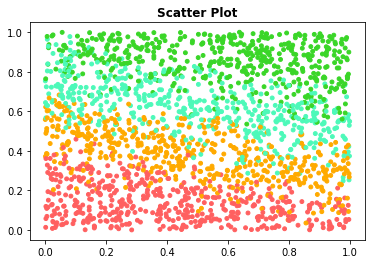

In [13]:
plt.scatter(x[:,0], x[:,1], c = y, cmap = cm_dark, s=15, label = y) 
plt.title("Scatter Plot", fontweight='bold')
plt.show(); 

Let's split our variables into train and test sets:

## Support Vector Machine with Linear Kernel 

In [14]:
for c_values in [1, 2, 3, 5,10, 20, 40, 60, 80, 100, 150, 200]:
  clf = SVC(kernel='linear', C = c_values).fit(X_train, Y_train) 
  scoretrain = clf.score(X_train, Y_train)
  scoretest = clf.score(X_test, Y_test) 
  print("Linear SVC of C: {}, Training Score: {:2f}, Testing Score: {:2f}\n".format(c_values, scoretrain, scoretest)) 

Linear SVC of C: 1, Training Score: 0.953750, Testing Score: 0.960000

Linear SVC of C: 2, Training Score: 0.959375, Testing Score: 0.975000

Linear SVC of C: 3, Training Score: 0.961875, Testing Score: 0.977500

Linear SVC of C: 5, Training Score: 0.968125, Testing Score: 0.975000

Linear SVC of C: 10, Training Score: 0.977500, Testing Score: 0.967500

Linear SVC of C: 20, Training Score: 0.980000, Testing Score: 0.967500

Linear SVC of C: 40, Training Score: 0.981250, Testing Score: 0.962500

Linear SVC of C: 60, Training Score: 0.981250, Testing Score: 0.962500

Linear SVC of C: 80, Training Score: 0.981875, Testing Score: 0.970000

Linear SVC of C: 100, Training Score: 0.980625, Testing Score: 0.967500

Linear SVC of C: 150, Training Score: 0.983125, Testing Score: 0.970000

Linear SVC of C: 200, Training Score: 0.984375, Testing Score: 0.972500



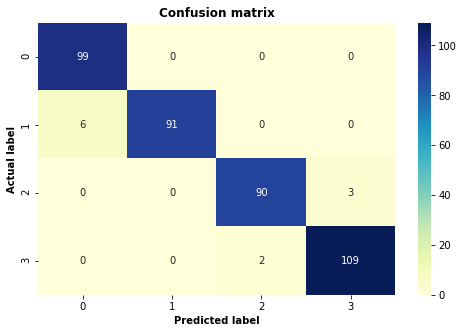

In [15]:
y_pred = clf.predict(X_test)  
cm = confusion_matrix(y_pred, Y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold'); 

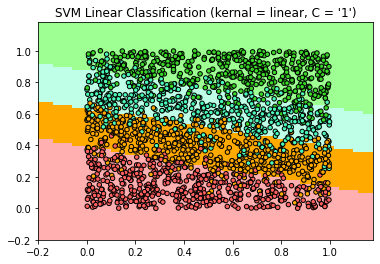

In [16]:
h =0.02
C_param = 1
clf1 = SVC(kernel = 'linear', C = C_param)
clf1.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Linear Classification (kernal = linear, C = '%s')"% (C_param))

plt.show()

## Linear Support Vector Machine

In [17]:
# Linear Support vector machine with only C Parameter 
for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C, max_iter=50000).fit(X_train,Y_train)
    scoretrain2 = clf2.score(X_train,Y_train)
    scoretest2  = clf2.score(X_test,Y_test) 
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain2,scoretest2))

Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 

Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 

Linear SVM value of C:5, training score :0.867500 , Test Score: 0.870000 

Linear SVM value of C:10, training score :0.874375 , Test Score: 0.875000 

Linear SVM value of C:40, training score :0.884375 , Test Score: 0.877500 

Linear SVM value of C:60, training score :0.886250 , Test Score: 0.880000 

Linear SVM value of C:80, training score :0.886875 , Test Score: 0.875000 

Linear SVM value of C:100, training score :0.888125 , Test Score: 0.877500 



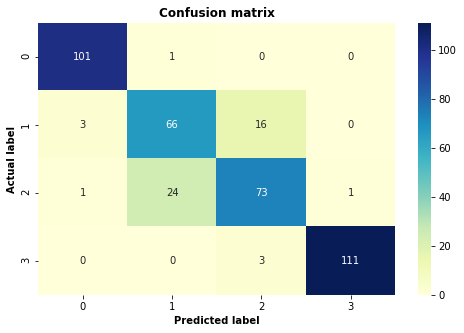

In [18]:
y_pred = clf2.predict(X_test)  
cm = confusion_matrix(y_pred, Y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold'); 

## Apparently we got better scores with SVC where we defined the kernal as linear than with just LinearSVC


## Support Vector Machine with Gaussian Kernel

In [19]:
# SMV with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test)) 

SVM for Non Linear 
 C:1 Training Score : 0.969375 Test Score : 0.862500

SVM for Non Linear 
 C:5 Training Score : 0.998750 Test Score : 0.872500

SVM for Non Linear 
 C:10 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:25 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:50 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:100 Training Score : 1.000000 Test Score : 0.877500



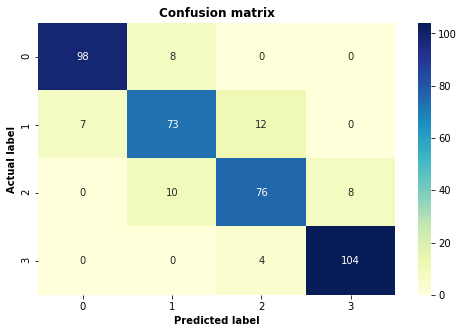

In [20]:
y_pred = clf3.predict(X_test)  
cm = confusion_matrix(y_pred, Y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');  

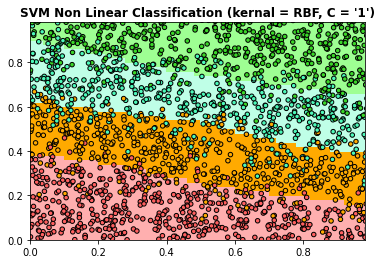

In [21]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
# we create an instance of Neighbours Classifier and fit the data.
clf4 = SVC(kernel='rbf',C=C_param)
clf4.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf4.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Non Linear Classification (kernal = RBF, C = '%s')"% (C_param), fontweight='bold')

plt.show();

In [22]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf5 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf5train = clf5.score(X_train,Y_train)
        clf5test  = clf5.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf5train,clf5test)) 

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

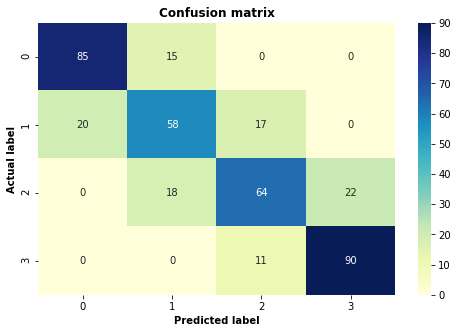

In [23]:
y_pred = clf5.predict(X_test)  
cm = confusion_matrix(y_pred, Y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');  

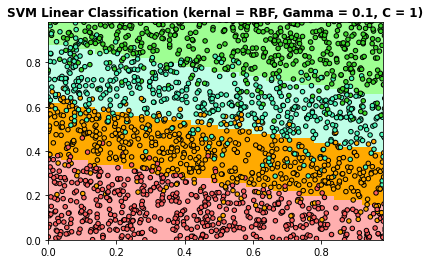

In [24]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
gamma_value = 0.1
# we create an instance of Neighbours Classifier and fit the data.
clf6 = SVC(kernel='rbf',C=C_param, gamma=gamma_value)
clf6.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf6.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Non Linear Classification (kernal = RBF, Gamma = {}, C = {})".format(gamma_value, C_param), fontweight='bold')

plt.show();

## THE GRIDSEARCH !!!!

Let's do something interesting,
you can pass all the expected values of the hyperparameters and it'll return the best value which fits the model.

In [25]:
# grid search method 
param_grid = {'C': [1, 2, 3, 5, 7, 10, 15, 20, 25, 50, 100, 120, 150],
              'gamma': [.1, .2, .5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5) 
GS.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 5, 7, 10, 15, 20, 25, 50, 100, 120,
                               150],
                         'gamma': [0.1, 0.2, 0.5, 0.1, 0.25, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_)) 

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.90.


## Support Vector Regressor

In [27]:
svr = SVR(kernel='linear', C=1, epsilon=.01).fit(X_train, Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train))) 

0.92 is the accuracy of the SV Regressor


- SVM supports linear and nonlinear regression.
- SVM Regression tries to fit as many instances as possible on the decision boundary while limiting margin violations.
- The width of the decision boundary is controlled by a hyperparameter ϵ.

In [28]:
# Kernalized SVM machine, by default kernel = 'rgf'
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train, Y_train))) 

1.00 is the accuracy of the SV Regressor


#Summary:

- You learned how to implement different types of SVMs'
- Visualized the SVM kernel plots
- Confusion Matrix in form of heatmap


## Reference:

- [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)